## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Understanding:

In [2]:
df=pd.read_csv("choclate.csv")

df.sample(5)

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
28,Gigi Bohling,Canada,Fruit & Nut Bars,"$6,314",15,6,97,"$6,217",98%
212,Husein Augar,New Zealand,Orange Choco,"$7,273",96,11,"1,020","$6,253",86%
152,Ches Bonnell,Canada,After Nines,"$8,435",42,10,410,"$8,025",95%
128,Oby Sorrel,Canada,Choco Coated Almonds,"$6,657",303,9,"2,621","$4,036",61%
58,Husein Augar,New Zealand,Manuka Honey Choco,"$1,085",273,7,"1,955",-$870,-80%


In [3]:
df.shape

(300, 9)

In [4]:
df.columns

Index(['Sales Person', 'Geography', 'Product', 'Amount', 'Units',
       'cost per unit', 'Cost', 'Profit', 'profit %'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   300 non-null    object
 1   Geography      300 non-null    object
 2   Product        300 non-null    object
 3   Amount         300 non-null    object
 4   Units          300 non-null    int64 
 5   cost per unit  300 non-null    int64 
 6   Cost           300 non-null    object
 7   Profit         300 non-null    object
 8   profit %       300 non-null    object
dtypes: int64(2), object(7)
memory usage: 21.2+ KB


## Data Cleaning:

#### Replace the dollar sign from Amount & Profit

In [8]:
# Assuming df is your DataFrame
df['Amount'] = df['Amount'].astype(str)  # Convert column to string type
df['Amount'] = df['Amount'].str.replace('$', '', regex=True)
df['Amount'] = df['Amount'].str.replace(',', '', regex=True)

# Remove any remaining non-numeric characters
df['Amount'] = df['Amount'].str.replace('[^0-9]', '', regex=True)

# Convert the 'Amount' column to integers
df['Amount'] = df['Amount'].astype(np.int64)


#### There is a value in the 'Profit' column that cannot be converted to an integer due to the presence of parentheses.To resolve this issue, I had to remove the parentheses from the 'Profit' column before converting it to an integer type

In [9]:
# Assuming df is your DataFrame
df['Profit'] = df['Profit'].astype(str)  # Convert column to string type
df['Profit'] = df['Profit'].str.replace('$', '', regex=True)
df['Profit'] = df['Profit'].str.replace(',', '', regex=True)
df['Profit'] = df['Profit'].str.replace('\(', '', regex=True)  # Escape '('
df['Profit'] = df['Profit'].str.replace('\)', '', regex=True)  # Escape ')'
df['Profit'] = df['Profit'].str.replace('[^0-9-]', '', regex=True)  # Remove non-numeric characters except '-'

# Convert the 'Profit' column to integers
df['Profit'] = df['Profit'].astype(np.int64)


#### Some Calculations

In [10]:
df['Cost']=df['Units'] * df['cost per unit']
df['Profit']= df['Amount'] - df['Cost']
df['profit %'] =df['Profit'] / df['Amount']
df['profit %'] =df['profit %'] *100
df['profit %'] =df['profit %'].round(2).astype(str) +'%'
df=df.rename(columns={'profit %' : 'Profit_Percentage'})
df=df.rename(columns={'cost per unit' : 'Cost_Per_Unit'})

In [11]:
df.head()

,Sales Person,Geography,Product,Amount,Units,Cost_Per_Unit,Cost,Profit,Profit_Percentage
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1596,28,1.72%
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,4131,2575,38.4%
2,Husein Augar,USA,Almond Choco,959,147,12,1764,-805,-83.94%
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1728,7904,82.06%
4,Curtice Advani,UK,White Choc,2100,414,13,5382,-3282,-156.29%


In [15]:
df.isnull().sum()

Sales Person         0
Geography            0
Product              0
Amount               0
Units                0
Cost_Per_Unit        0
Cost                 0
Profit               0
Profit_Percentage    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Amount,Units,Cost_Per_Unit,Cost,Profit
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4136.230000,152.200000,9.473333,1465.230000,2671.000000
std,3124.832629,118.099499,3.457717,1367.185074,3388.002574
min,0.000000,0.000000,3.000000,0.000000,-8025.000000
25%,1652.000000,54.000000,6.000000,468.000000,184.500000
50%,3437.000000,124.500000,9.000000,1075.500000,2324.500000
75%,6179.250000,220.500000,12.000000,2034.000000,4774.250000
max,16184.000000,525.000000,17.000000,8823.000000,15833.000000


In [22]:
df.describe(include=object)

,Sales Person,Geography,Product,Profit_Percentage
count,300,300,300,300
unique,10,6,22,297
top,Curtice Advani,India,Organic Choco Syrup,47.77%
freq,38,58,18,2


## Univariate Analysis:

### Amount:

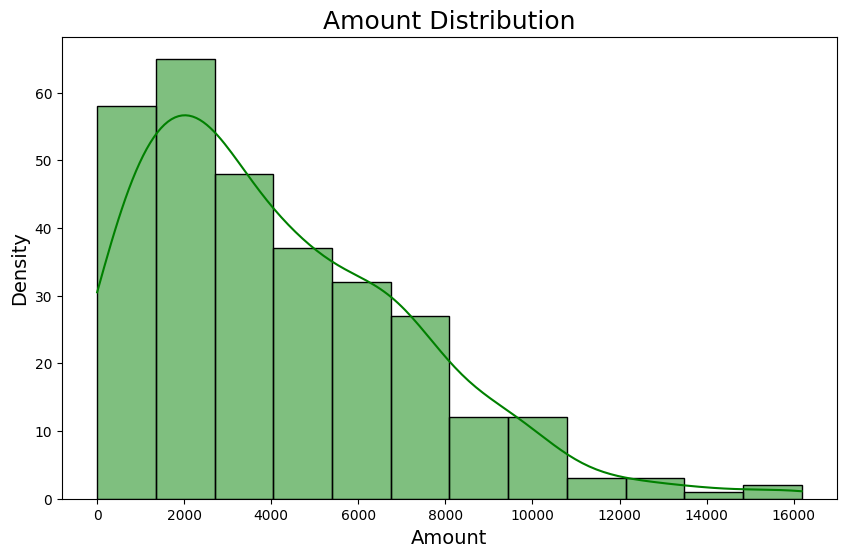

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'],kde=True,color='green')
plt.title('Amount Distribution',size=18)
plt.xlabel('Amount',size=14)
plt.ylabel('Density',size=14)
plt.show()

### Profit:

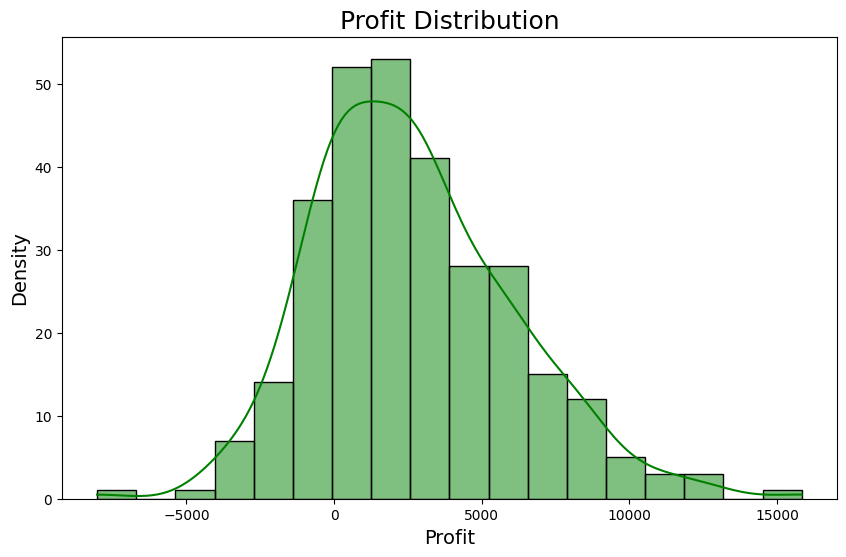

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Profit'],kde=True,color='green')
plt.title('Profit Distribution',size=18)
plt.xlabel('Profit',size=14)
plt.ylabel('Density',size=14)
plt.show()

### BoxPlot for Numerical Variable:

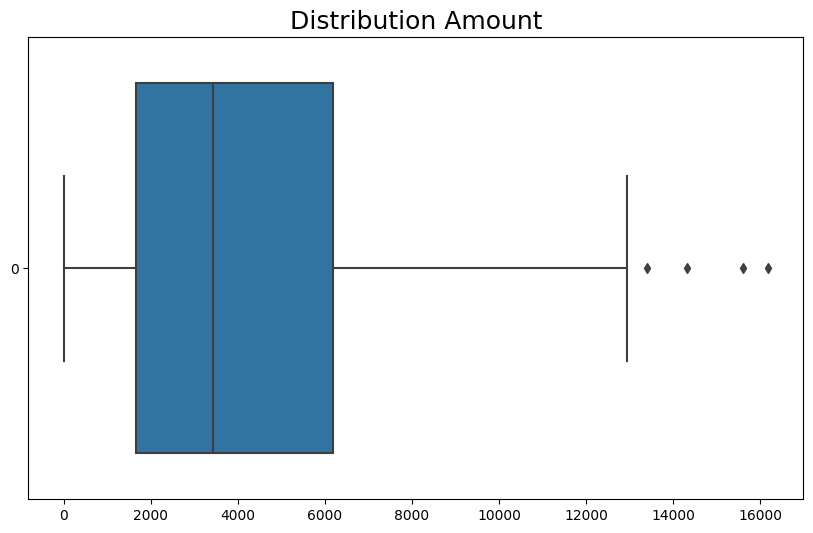

In [17]:
plt.figure(figsize = (10,6))
sns.boxplot(df.Amount,orient='h')
plt.title('Distribution Amount',size=18)
plt.show()

In [18]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4527.25


In [19]:
Upper_Quartile=Q3+1.5*IQR
Lower_Quartile=Q1-1.5*IQR
df[(df['Amount']<Lower_Quartile) | (df['Amount'] > Upper_Quartile)]

,Sales Person,Geography,Product,Amount,Units,Cost_Per_Unit,Cost,Profit,Profit_Percentage
17,Gigi Bohling,India,Orange Choco,15610,339,11,3729,11881,76.11%
50,Gigi Bohling,Canada,Mint Chip Choco,16184,39,9,351,15833,97.83%
72,Husein Augar,India,Caramel Stuffed Bars,14329,150,10,1500,12829,89.53%
79,Gigi Bohling,USA,Raspberry Choco,13391,201,12,2412,10979,81.99%


## Univarite Analysis for Categorical Variable:

### Sales Person:

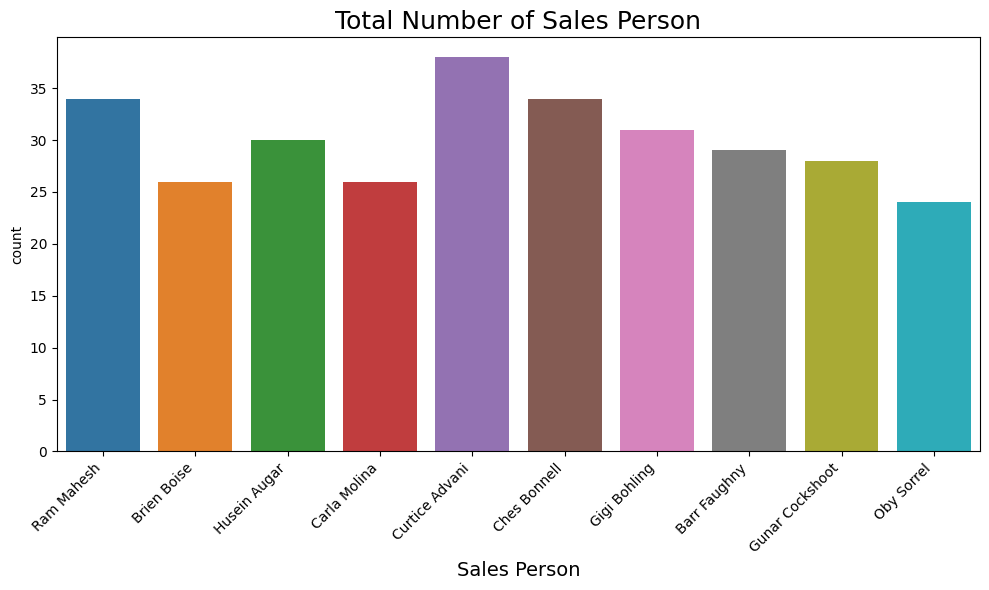

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sales Person')
plt.title('Total Number of Sales Person', size=18)
plt.xlabel('Sales Person', size=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Geography:

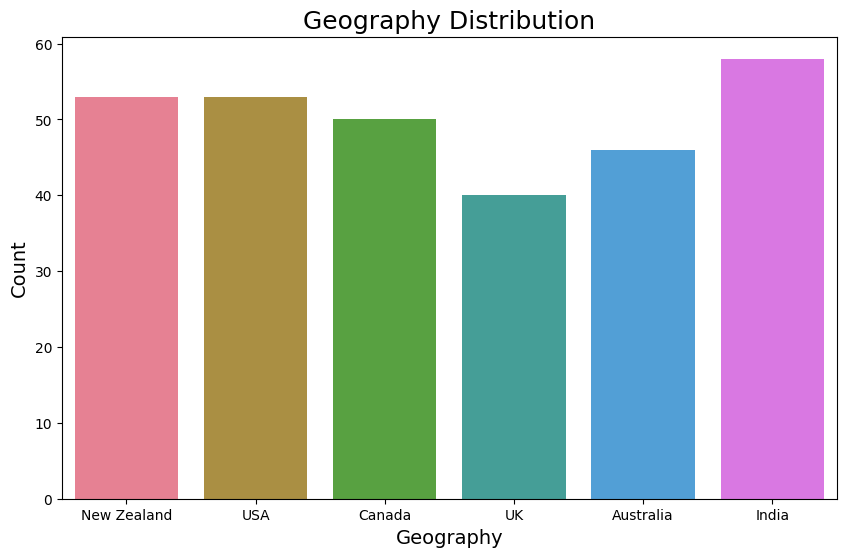

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(data=df,x='Geography',palette='husl')
plt.title('Geography Distribution',size=18)
plt.xlabel('Geography',size=14)
plt.ylabel('Count',size=14)
plt.show()

## Using the GroupBy function on the 'Geography' Column

## Pivot Table 

In [ ]:
df.pivot_table(index='Sales Person',columns='Geography',values='Units',aggfunc='count',margins=True)

In [ ]:
df.pivot_table(index='Sales Person',columns='Geography',values='Profit',aggfunc='sum',margins=True)

In [ ]:
df.pivot_table(index='Product',columns='Geography',values='Profit',aggfunc='sum',margins=True,fill_value=0)

## Data Visualization 

In [ ]:
plt.axis('equal')
g['Amount'].mean().plot(kind='pie',autopct='%0.2f%%',radius=3.5,shadow=True,explode=[0,0.3,0,0,0,0.2])
plt.show()

In [ ]:
plt.axis('equal')
g['Profit'].mean().plot(kind='pie',autopct='%0.2f%%',radius=3.5,shadow=True,explode=[0,0.3,0,0,0,0.2])
plt.show()

## Bar Graph

In [ ]:
plt.bar(df['Geography'],df['Profit'],width=0.5,label='Profit',color='Green')
plt.xlabel("Country Name")
plt.ylabel("Profit/Unit")
plt.title("Profits of Each Country")
plt.legend()

## Set the figure size
fig = plt.gcf()
fig.set_size_inches(10, 7)
# Adjust plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

In [ ]:
plt.bar(df['Geography'],df['Amount'],width=0.5,label='Amount',color='Red')
plt.xlabel("Country Name")
plt.ylabel("Amount")
plt.title("Amount of Each Country")
plt.legend()
## Set the figure size
fig = plt.gcf()
fig.set_size_inches(10, 7)
# Adjust plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

In [ ]:
plt.bar(df['Geography'],df['Units'],width=0.5,label='Unit',color='Black')
plt.xlabel("Country Name")
plt.ylabel("Unit")
plt.title("Unit of Each Country")
plt.legend()
## Set the figure size
fig = plt.gcf()
fig.set_size_inches(10, 7)
# Adjust plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

##  Using the GroupBy function on the 'Sales Person' column

In [ ]:
df['Sales Person'].unique()

In [ ]:
g1=df.groupby('Sales Person')

In [ ]:
plt.axis('equal')
g1['Profit'].sum().plot(kind='pie',autopct='%0.2f%%',radius=3.5,shadow=True)
plt.show()

In [ ]:
df['Product'].unique()

In [ ]:
g2=df.groupby('Product')

In [ ]:
for Product,Product_df in g2:
    print(Product)
    print(Product_df)

In [ ]:
g2.describe()

In [ ]:
plt.axis('equal')
g2['Profit'].sum().plot(kind='pie',autopct='%0.2f%%',radius=3.5,shadow=True)
plt.show()

## How I cleaned the data:

1. Replace the dollar sign from Amount & Profit.
2. Changing their datatype to Integer(int64)


## Calculation:

1. Cost = Units * Cost_Per_Unit
2. Profit= Amount - Cost
3. Profit_Percentage =(Profit/Amount)*100



## Summarize:

#### Sales Person:
    1. Salesperson Curtice Advani has sold the most chocolate in six countries compared to other salespeople.
    2. Salesperson Gigi Bohling has earned the highest profit in six countries compared to other salespeople, with Ram Mahesh being the second-highest earner.
#### Products:
    1. In Australia, the flavors Orange Choco and Raspberry Choco are not available. In Canada, the products 50% Dark Bites, 85% Dark Bars, Orange Choco, and Raspberry Choco are not available. In India, the product Drinking Coco is not available. In New Zealand, the products Choco Coated Almonds and Milk Bars are not available. In the UK, the products 99% Dark & Pure, Almond Choco, Choco Coated Almonds, and Milk Bars are not available.	
    2. All kinds of chocolate products are available only in the USA.
    3. Among those five countries, Baker's Choco Chips is the most profitable chocolate.
#### Country:
    1. Canada spends the most amount to buy the product.
    2. Among the other countries, Canada's profit is significantly higher than the other six countries.
#### The reason behind Canada's success:
    Canada's total profit is 170,063, with a significant portion of it coming from the Mint Chip Choco product. While the     six countries generated a minimal profit of 42,725 from this product combined, Canada alone contributed 35,935 in profit from Mint Chip Choco, showcasing its exceptional performance and contribution to Canada's overall profit.